MUSIC RECOMMENDATION PROTOTYPE

GNOD
Introduction
You have been hired as a Data Analyst for Gnod.

Gnod is a site that provides recommendations for music, art, literature and products based on collaborative filtering algorithms. Their flagship product is the music recommender, which you can try at www.gnoosic.com. The site asks users to input 3 bands they like, and computes similarity scores with the rest of the users. Then, they recommend to the user bands that users with similar tastes have picked.

Gnod is a small company, and its only revenue stream so far are adds in the site. In the future, they would like to explore partnership options with music apps (such as Deezer, Soundcloud or even Apple Music and Spotify). But for that to be possible, they need to expand and improve their recommendations.

That’s precisely where you come. They have hired you as a Data Analyst, and they expect you to bring a mix of technical expertise and business mindset to the table.

Jane, CTO of Gnod, has sent you an email assigning you with your first task.

The Challenge
This is an e-mail Jane - CTO of Gnod - sent over your inbox in the first weeks working there.

Copy
Dear xxxxxxxx,
 
We are thrilled to welcome you as a Data Analyst for Gnoosic!
 
As you know, we are trying to come up with ways to enhance our music recommendations. One of the new features we'd like to research is to recommend songs (not only bands). We're also aware of the limitations of our collaborative filtering algorithms, and would like to give users two new possibilities when searching for recommendations:
 
- Songs that are actually similar to the ones they picked from an acoustic point of view.
- Songs that are popular around the world right now, independently from their tastes.
 
Coming up with the perfect song recommender will take us months - no need to stress out too much. In this first week, we want you to explore new data sources for songs. The internet is full of information and our first step is to acquire it do an initial exploration. Feel free to use APIs or directly scrape the web to collect as much information as possible from popular songs. Eventually, we'll need to collect data from millions of songs, but we can start with a few hundreds or thousands from each source and see if the collected features are useful. 
 
Once the data is collected, we want you to create clusters of songs that are similar to each other. The idea is that if a user inputs a song from one group, we'll prioritize giving them recommendations of songs from that same group.
 
On Friday, you will present your work to me and Marek, the CEO and founder. Full disclosure: I need you to be very convincing about this whole song-recommender, as this has been my personal push and the main reason we hired you for!
 
Be open minded about this process: we are agile, and that means that we define our products and features on-the-go, while exploring the tools and the data that's available to us. We'd love you to provide your own vision of the product and the next steps to be taken.
 
Lots of luck and strength for this first week with us!
 
Jane
Have fun and enjoy the ride!

In [1]:
#Importing libraries that we might use 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import random
import spotipy
import json
import warnings
import sklearn.preprocessing
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from spotipy.oauth2 import SpotifyClientCredentials



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading data

data = pd.read_csv('data.csv')
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [4]:
#dropped columns at the beginning to resolve features mismatch on the prototype

data.drop(['explicit'], axis=1, inplace= True)
data.drop(['popularity'], axis=1, inplace= True)
data.drop(['year'], axis=1, inplace= True)

In [5]:
#reducing our sample size to run the system faster in product testing 
data = data[:-154389]
data.shape


(20000, 16)

In [6]:
#checking null and NA 

print("---------- Data NA:")
print(data.isna().sum())
print("---------- Data null:")
print(data.isnull().sum())

---------- Data NA:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
release_date        0
speechiness         0
tempo               0
valence             0
dtype: int64
---------- Data null:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
release_date        0
speechiness         0
tempo               0
valence             0
dtype: int64


In [7]:
#indexed song name to perform preprocessing storing song info 

data = data.set_index("name")


In [8]:
#checking indexing derhyu
data

,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,1920,0.0936,149.976,0.6340
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,1920-01-05,0.0534,86.889,0.9500
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,1920,0.1740,97.600,0.6890
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,1920-01-01,0.0425,127.997,0.0422
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,1920-10-01,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,"['Lange', 'Andy Moor', 'Stadium4']",0.439,203612,0.937,2Cu7GOgViPVDx9QmhWOrIm,0.895000,11,0.3300,-10.203,0,2021-01-22,0.0447,131.992,0.0709
TE MUDASTE,0.234000,['Bad Bunny'],0.811,130014,0.637,5RubKOuDoPn5Kj5TLVxSxY,0.000572,10,0.1180,-4.835,0,2020-11-27,0.0591,92.025,0.4710
Blue Monday (Year in Review 2020),0.003790,['Above & Beyond'],0.646,206748,0.792,4WxGMzTRECd5KMfPUPUAjZ,0.547000,7,0.2390,-8.355,1,2021-01-22,0.0358,130.012,0.4270


In [9]:
#separating numerical columns to run model as categorical features are not relevant for our scope 

num = data.select_dtypes(np.number)


In [10]:
num

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
name,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
I Put A Spell On You,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
Golfing Papa,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
Xuniverxe,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0.895000,11,0.3300,-10.203,0,0.0447,131.992,0.0709
TE MUDASTE,0.234000,0.811,130014,0.637,0.000572,10,0.1180,-4.835,0,0.0591,92.025,0.4710
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0.547000,7,0.2390,-8.355,1,0.0358,130.012,0.4270


In [11]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.525564,0.552576,2.215271e+05,0.465127,0.161390,5.183650,0.202078,-11.541631,0.719000,0.097281,116.676079,0.550017
std,0.381800,0.169744,1.036479e+05,0.263658,0.312065,3.481268,0.168593,5.319268,0.449499,0.164314,30.440957,0.254885
min,0.000000,0.000000,1.037100e+04,0.000020,0.000000,0.000000,0.000000,-47.046000,0.000000,0.000000,0.000000,0.000000
25%,0.112000,0.436000,1.678498e+05,0.244000,0.000000,2.000000,0.098200,-14.452250,0.000000,0.034700,93.866500,0.349000
50%,0.579000,0.566000,2.002000e+05,0.438000,0.000146,5.000000,0.136000,-10.860000,1.000000,0.044900,114.817500,0.568000
75%,0.921000,0.679000,2.546068e+05,0.681000,0.075800,8.000000,0.258000,-7.599000,1.000000,0.073500,133.993250,0.759000
max,0.996000,0.988000,2.593268e+06,1.000000,1.000000,11.000000,0.996000,0.878000,1.000000,0.967000,221.741000,0.991000


In [12]:
# scaling data
X_prep = StandardScaler().fit_transform(num)


In [13]:
# using pickle to store the scaler 

import pickle

scaler = StandardScaler().fit(num)
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [14]:
# checking the scaled dataframe

pd.DataFrame(X_prep, columns=num.columns).head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,1.219089,0.267611,-0.513232,-0.914565,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.022404,1.093946,0.329504
1,0.307594,1.764022,-0.688184,0.196749,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-0.267064,-0.978544,1.569312
2,1.224327,0.556289,-0.556707,-1.058694,-0.517125,-1.489049,1.879856,-0.104598,0.625156,0.466917,-0.626674,0.545293
3,-1.376123,1.045273,1.935060,1.262549,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.333403,0.371907,-1.992390
4,-0.603901,0.892098,-0.543228,0.917397,-0.516393,1.383539,1.185858,1.035061,-1.599600,-0.124650,0.177394,-0.984850
5,1.232185,-0.757488,-0.220946,-0.834914,2.043248,-0.052755,0.195280,0.013467,0.625156,-0.350444,-0.420696,-0.286477
6,1.221708,1.351625,-0.254011,-1.546838,-0.517176,-0.052755,-0.154684,-0.171338,0.625156,-0.231765,-1.019181,-0.247242
7,1.232185,-0.462920,-0.341106,-0.857671,0.078864,1.096280,-0.041984,0.343971,0.625156,-0.416173,-1.244804,-0.721979
8,1.232185,-0.492376,-0.720602,-0.861464,2.559180,0.809021,-0.314837,-1.348973,0.625156,-0.141083,0.439679,0.278499
9,-1.358713,0.108544,2.458161,1.091869,2.280385,0.809021,-0.652939,0.864545,0.625156,-0.320622,0.338924,-1.691069


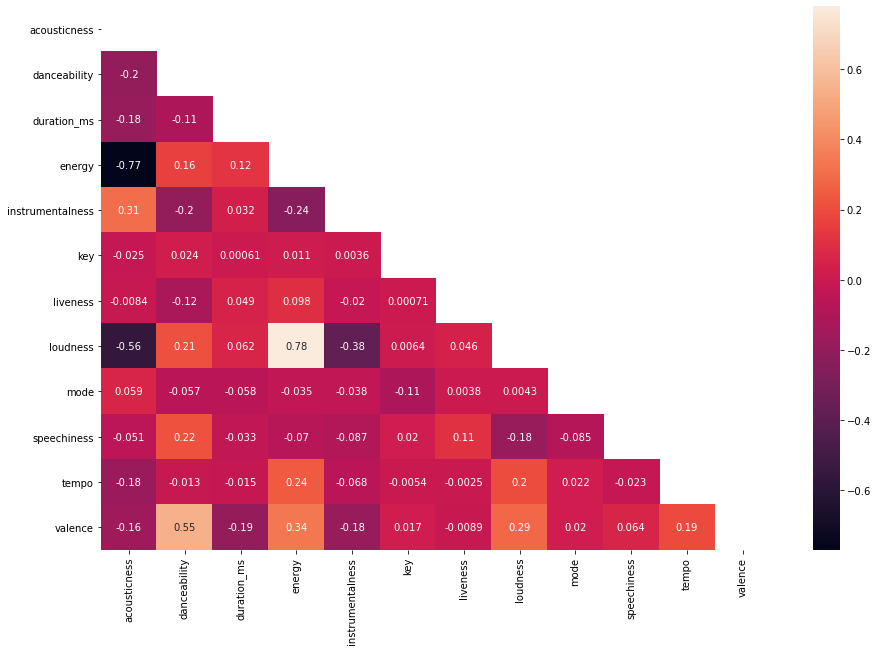

In [15]:
# Correlation Matrix 
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [16]:
#Preparing kmeans for our first model 

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)


KMeans(random_state=1234)

In [17]:
import joblib 

In [18]:
#storing the model 

joblib.dump(kmeans, 'model.pkl')  
model_loaded = joblib.load('model.pkl')


In [19]:
#checking number of values per cluster 
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()


0    4031
1     614
2    1093
3    2952
4    3466
5    5493
6    2068
7     283
dtype: int64

In [20]:
#integrated our dataframe with the clusters

X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,1.219089,0.267611,-0.513232,-0.914565,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.022404,1.093946,0.329504,0
1,0.307594,1.764022,-0.688184,0.196749,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-0.267064,-0.978544,1.569312,3
2,1.224327,0.556289,-0.556707,-1.058694,-0.517125,-1.489049,1.879856,-0.104598,0.625156,0.466917,-0.626674,0.545293,0
3,-1.376123,1.045273,1.935060,1.262549,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.333403,0.371907,-1.992390,5
4,-0.603901,0.892098,-0.543228,0.917397,-0.516393,1.383539,1.185858,1.035061,-1.599600,-0.124650,0.177394,-0.984850,3


In [21]:
# printing inertia 
kmeans.inertia_

131407.44353133178

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

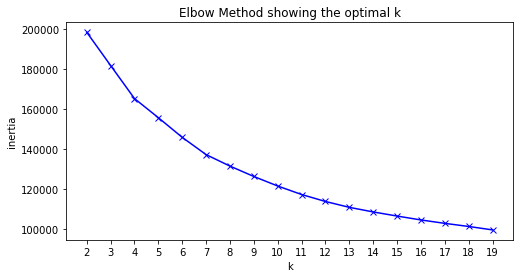

In [22]:
#Elbow method

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

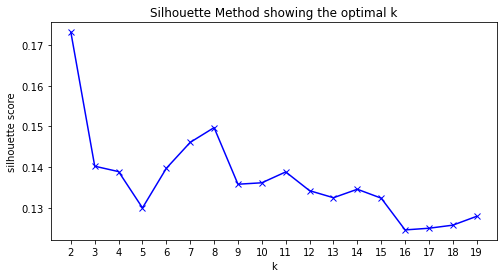

In [23]:
#from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(8,4))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [24]:
xx =[10,20,40,50,60]
yy =[3,5,7,9]
zz = [2,3,4,5]
ww = [0,1,2]
for x in xx:
    for y in yy:
        for z in zz:
            for w in ww:
            
                kmeans = KMeans(n_clusters=x,
                                init="random",
                                n_init=y,  # try with 1, 4, 8, 20, 30, 100...
                                max_iter=z,
                                tol=w,
                                algorithm="full",
                                random_state=1234)
                kmeans.fit(X_prep)
                if kmeans.inertia_ < 1000000:
                    print(x,y,z,w)
                    print(kmeans.inertia_)


10 3 2 0
132395.46058515686
10 3 2 1
132395.46058515686
10 3 2 2
132395.46058515686
10 3 3 0
128746.33281875771
10 3 3 1
128746.33281875771
10 3 3 2
128746.33281875773
10 3 4 0
127162.37454415129
10 3 4 1
128746.33281875771
10 3 4 2
128746.33281875773
10 3 5 0
126340.08159418861
10 3 5 1
128746.33281875771
10 3 5 2
128746.33281875771
10 5 2 0
132395.46058515686
10 5 2 1
132395.46058515686
10 5 2 2
132395.46058515686
10 5 3 0
128746.33281875771
10 5 3 1
128746.33281875771
10 5 3 2
128746.33281875771
10 5 4 0
127162.37454415132
10 5 4 1
128746.33281875771
10 5 4 2
128746.33281875774
10 5 5 0
126340.08159418861
10 5 5 1
128746.33281875771
10 5 5 2
128746.33281875771
10 7 2 0
132395.46058515686
10 7 2 1
132395.46058515686
10 7 2 2
132395.46058515686
10 7 3 0
128746.33281875771
10 7 3 1
128746.33281875773
10 7 3 2
128746.33281875771
10 7 4 0
127162.37454415129
10 7 4 1
128746.33281875773
10 7 4 2
128746.33281875771
10 7 5 0
126340.08159418861
10 7 5 1
128746.33281875771
10 7 5 2
128746.3328

In [25]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=400,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

131407.25597809706


In [26]:
# creating a copy of the num dataset
df_cluster = num.copy()
df_cluster = df_cluster.iloc[:174389]

In [27]:
df_cluster

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
name,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
I Put A Spell On You,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
Golfing Papa,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
Xuniverxe,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0.895000,11,0.3300,-10.203,0,0.0447,131.992,0.0709
TE MUDASTE,0.234000,0.811,130014,0.637,0.000572,10,0.1180,-4.835,0,0.0591,92.025,0.4710
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0.547000,7,0.2390,-8.355,1,0.0358,130.012,0.4270


In [28]:
df_cluster.to_csv(r'data1.csv', index = False)


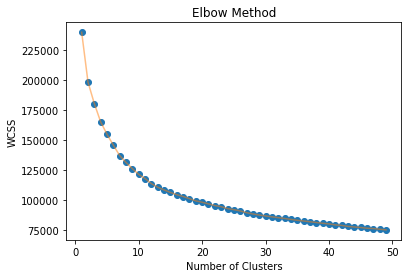

In [29]:
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50), wcss, 'o')
plt.plot(range(1 , 50) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

# The number we're looking for is the position where the line starts to flatten, making it look like an elbow for the plot. 
# After some testing, I've figured out that 8 clusters yield better results.

In [30]:
wcss

[239999.99999999916,
 198363.52364367023,
 180438.45019177085,
 165184.1920965426,
 154866.99213194917,
 145786.8744531547,
 137153.47642981738,
 131407.5234870377,
 126212.2727050211,
 121445.7100823423,
 118031.11784592037,
 113707.52982199991,
 110774.03665041664,
 108474.25493434971,
 106423.17585636747,
 104513.69388150505,
 103012.30214092239,
 101251.40702343553,
 99385.72796797592,
 98232.73775348518,
 96873.78867895523,
 95457.97630698896,
 94544.77665986447,
 92953.70990694381,
 92053.24371283193,
 90992.64027571876,
 89551.73315407778,
 88451.15193906067,
 87557.1194987214,
 86817.41019088367,
 86063.1102828129,
 85389.71425228292,
 84714.08331230187,
 83909.09339053527,
 83183.7078750835,
 82611.9608401196,
 81935.13124806,
 81345.17746559181,
 80715.18980056612,
 80169.44007081664,
 79357.6974924021,
 78929.51631623697,
 78115.9221452154,
 77591.23236945421,
 77201.44795873183,
 76572.67721414819,
 76283.67619136181,
 75727.07174026278,
 75169.2408029262]

In [31]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_prep)

In [32]:
y_kmeans.shape

(20000,)

In [33]:
X_prep.shape

(20000, 12)

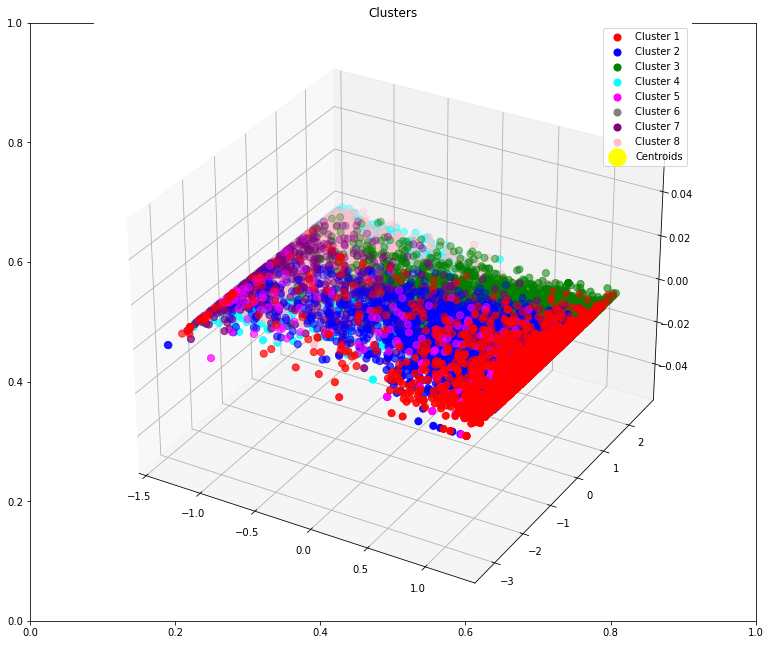

In [34]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_prep[y_kmeans == 0,0],X_prep[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(X_prep[y_kmeans == 1,0], X_prep[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(X_prep[y_kmeans == 2,0], X_prep[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(X_prep[y_kmeans == 3,0], X_prep[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(X_prep[y_kmeans == 4,0], X_prep[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(X_prep[y_kmeans == 5,0], X_prep[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(X_prep[y_kmeans == 6,0], X_prep[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(X_prep[y_kmeans == 7,0], X_prep[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=8)    
kmeans.fit(X_prep)
y_kmeans = kmeans.predict(X_prep)
y_kmeans

array([6, 4, 6, ..., 7, 7, 4])

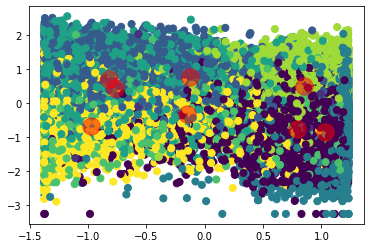

In [36]:
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

In [37]:
from sklearn.cluster import DBSCAN


In [38]:
model = DBSCAN(eps=0.99, min_samples=8)
# fit model and predict clusters, I have tried with smaller epsilon but I was getting worse results in terms of noise on the plot
yhat = model.fit_predict(X_prep)

In [39]:
clusters1 = np.unique(yhat)
clusters1

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

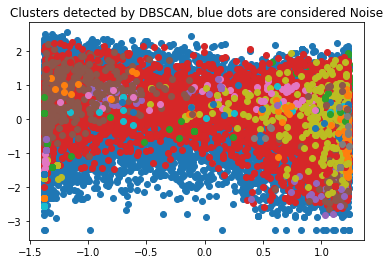

In [40]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
for cluster in clusters1:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    #X_df[x_df['clusters'] == cluster]
    # create scatter of these samples
    plt.scatter(X_prep[row_ix, 0], X_prep[row_ix, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

In [41]:
#is possible that to get better results but for MVP I decided to keep the results on 30 clusters as on the first test

In [42]:
data["cluster"]=clusters
data.head()

,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,cluster
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,1920,0.0936,149.976,0.6340,0
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,1920-01-05,0.0534,86.889,0.9500,3
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,1920,0.1740,97.600,0.6890,0
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,1920-01-01,0.0425,127.997,0.0422,5
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,1920-10-01,0.0768,122.076,0.2990,3


In [43]:
data.to_csv(r'Cluster_data.csv', index = False)


In [44]:
data2 = pd.read_csv('hottest_data.csv')
data2.head(20)

,song_title,artist_song
0,Heat Waves,Glass Animals
1,Booster Seat,Spacey Jane
2,The Difference,Flume and Toro y Moi
3,Cherub,Ball Park Music
4,Lost in Yesterday,Tame Impala
5,WAP,Cardi B featuring Megan Thee Stallion
6,Hyperfine,G Flip
7,Sending Me Ur Loving,The Jungle Giants
8,I'm Good?,Hilltop Hoods
9,Therefore I Am,Billie Eilish


In [45]:
num

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
name,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
I Put A Spell On You,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
Golfing Papa,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
Xuniverxe,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0.895000,11,0.3300,-10.203,0,0.0447,131.992,0.0709
TE MUDASTE,0.234000,0.811,130014,0.637,0.000572,10,0.1180,-4.835,0,0.0591,92.025,0.4710
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0.547000,7,0.2390,-8.355,1,0.0358,130.012,0.4270


In [46]:
for col_num in num.columns: 
    print(col_num)

acousticness
danceability
duration_ms
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
valence


In [47]:
X_prep2 = StandardScaler().fit_transform(num)


In [48]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='8f76a1a9a0f14fc58d3e8e7a8b4fc9ed',
                                                           client_secret='60fac20c62744f18b8926760e23169fe' ))

In [49]:
for song in num.index:
    print(song)

Keep A Song In Your Soul
I Put A Spell On You
Golfing Papa
True House Music - Xavier Santos & Carlos Gomix Remix
Xuniverxe
Crazy Blues - 78rpm Version
Don't You Advertise Your Man
Arkansas Blues
La Chacarera - Remasterizado
Broken Puppet - Original Mix
Oouin
Desengaño - Remasterizado
Ta oula sou
Schumacher
Mparmpaouzos
To katinaki
Oli mera paizei zaria
El Africano - Remasterizado
Vre ti magkas pou eimai ego
Thelo na se lismoniso
On a Ragga Trip
Sirtó prevezániko
Big Rip
Sweet Reggae Music
True House Music - Original Massive Mix
Taro Yard Slaughter House
I photoúla, beráti
Serenade of the Bells
Comme à l'époque
Aidiniko
Bou Dou Ba Da Bouh
Day After - Original Mix
Oh Maurice
Jesus Paid It All
Voodoo Doll
Dancehall Good To Me
Penticton Kitty
Sweat (A La La La La Long)
Headbanger - Original Mix
Kexirr
Kansas City Man Blues - 78rpm Version
Ca N'vaut Pas L'amour
Mean Man
#NOHOOK
Brusque - Original Mix
Quantum Fluctuation
Cloud 9
Big Jim and the Twins
YP
Neráida, tsámiko
Ntourou Ntourou
Indio

Otoñal - Instrumental (Remasterizado)
Milongada - Instrumental (Remasterizado)
Perro Flaco - Instrumental (Remasterizado)
Часть 34.5 - Обратный путь
Un Vieux Farceur
Tico-Tico no Fubá
Часть 47.3 - Обратный путь
12 Études, Op. 10: No. 10 in A-Flat Major
Summer Paradise
Часть 16.3 - Обратный путь
Часть 42.4 - Обратный путь
Часть 3.5 - Обратный путь
24 Préludes, Op. 28: No. 16 in B-Flat Minor. Presto con fuoco
Chapter 2.2 - Dziewczynka z Luna Parku: Część 2
Amar Jabar Samoy Holo
Depot Blues
Часть 13.3 - Обратный путь
Часть 54.4 - Обратный путь
Crooked Creek Blues
Часть 47.5 - Обратный путь
24 Préludes, Op. 28: No. 6 in B Minor. Lento assai
Часть 18.3 - Обратный путь
Na Jeyo Na Jeyo Nako
Часть 34.3 - Обратный путь
After Your Kiss
Kam Boethna Maa El Naseem
Llorando Mis Penas - Remasterizado
Часть 48.6 & Часть 49.1 - Обратный путь
The Worried Blues
Часть 4.6 - Обратный путь
Часть 26.2 - Обратный путь
Часть 55.10 & Часть 56.1 - Обратный путь
Li Lathaton
Часть 52.2 - Обратный путь
La Marcha Nu

Blue Skies - 78rpm Version
Blue Xmas (To Whom It May Concern)
Ramblin' On My Mind - Take 1
Snowfall (with The Glenn Miller Orchestra)
Winter Weather - Mono Recording
Come On In My Kitchen - Take 2
Little Jack Frost Get Lost (with Marjorie Hughes) - 78rpm Version
Winter Weather
'Twas the Night Before Christmas
Deck Us All With Boston Charlie
I Want You for Christmas
Rudolph The Red-Nosed Reindeer
Stop Breakin' Down Blues - Take 1
Rudolph The Red Nosed Reindeer
Boogie Woogie (I May Be Wrong)
I've Got My Love to Keep Me Warm
White Christmas
Sleigh Ride (with Paula Kelly)
There's Frost On The Moon
The Christmas Song (Chestnuts Roasting On An Open Fire)
Have Yourself A Merry Little Christmas
From Four Until Late
Terraplane Blues
Christmas Night In Harlem
Walkin' Blues
Santa Claus Is Coming To Town
Kind Hearted Woman Blues - Take 2
The Christmas Song (Chestnuts Roasting On An Open Fire)
Traveling Riverside Blues
32-20 Blues
Happy Holiday
I'm a Steady Rollin' Man
When You Got a Good Friend - 

Nocturnes, Op. 37: No. 2 in G Major
Oop-Pop-A-Da - 1994 Remastered
Moonshine Lullaby
Annie Get Your Gun: Overture
3 Waltzes, Op. 34: No. 2 in A Minor
Hum Tum Yug Yug Se
Mazurkas, Op. 17: No. 4 in A Minor
Mother's Only Sleeping
I'm An Indian Too
Dil Jalta Hai To Jalne De (From "Pehli Nazar")
The Girl That I Marry
Nocturnes, Op. 48: No. 1 in C Minor
An Old-Fashioned Wedding
I Got Lost In His Arms
Nocturnes, Op. 9: No. 1 in B-Flat Minor
Colonel Buffalo Bill
Anthropology (Take 1)
I'm A Bad, Bad Man
Violin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderato - Redbook Stereo
Nocturnes, Op. 9: No. 3 in B Major
Ram Kare Aisa Ho Jaye
Shining Path
2 Waltzes, Op. posth. 69: No. 1 in A-Flat Major "Valse de l'adieu"
Who Do You Love, I Hope?
My Defenses Are Down
Sull aria... Che soave zeffiretto from The Marriage of Figaro - Voice
Faker Lma Kont Ganby
Nocturnes, Op. 55: No. 1 in F Minor
Good Bait
Mazurkas, Op. 17: No. 2 in E Minor
Nocturnes, Op. 15: Nocturne in F Major, No. 1
Nocturnes

Cuatro Copas
Who Knows? - Alternate Take/Rudy Van Gelder 24-Bit Mastering/1998 Digital Remaster
Go Go Go Go
Get Happy
Autumn Leaves
Jungle Flower
Make Believe
Oooh-Dahdily-Dah
Perfidia
One Mint Julep
Sophisticated Lady
Thank God I'm On My Way
Black Beauty
Jungle River Boat
The Tattooed Bride
Just Ain't
Adeste Fideles
Tea For Two
Ahmad's Blues
Eleanor
Castle Rock
Alma de Acero
Solitude
Lullaby of Broadway
He Took Your Place
Chili Sauce
Pennies From Heaven
The Surrey With The Fringe On Top
The Squirrel
Coronation
Love Is Here To Stay
School Days
Squeeze Me
A Tree Grows in Brooklyn: Make the Man Love Me
Christmas Story (with Paul Weston & His Orchestra & The Norman Luboff Choir)
Double Talk
A Tree Grows in Brooklyn: Overture
I Got Rhythm
A Tree Grows in Brooklyn: I'm Like a New Broom
Boney Bones
Basta
Don't Blame Me
I'm In Love With You
Shola Jo Bhadke
A Tree Grows in Brooklyn: Payday / Mine 'Til Monday
Born To Be Blue - Instrumental/Remastered
A Tree Grows in Brooklyn: Love is the Reason

Bésame Mucho
Go Now!
Cathy's Clown - Remastered Album Version
(Somebody) Ease My Troublin' Mind
Sweet Nothin's
Moanin'
Medley: We Three Kings Of Orient Are/O Little Town Of Bethlehem
Somethin' Else
Autumn Leaves
Good Morning Blues
Christmas Is A Comin'
Rhode Island Is Famous For You
I Heard The Bells On Christmas Day
My Groove Your Move - Rudy Van Gelder Edition
White Christmas - Alternate Take
Just For You
Fruit Of Dreams
Love Hurts - Remastered Version
Let's Fall in Love
Stranger In Paradise
Last Date - Instrumental
When I Fall In Love
Happy Birthday, Sweet Sixteen
Road Runner
I Need Some Money
Such a Night
Smoke! Smoke! Smoke! (That Cigarette)
Walking To New Orleans
Only Sixteen
Easy To Love
The Christmas Song - Alternate Take
House Of The Rising Sun
I Can't Believe That You're In Love With Me - Remastered/1998
Unchained Melody
I've Grown Accustomed To Her Face - Remastered/1998
The Nutcracker Suite, Op. 71a, TH 35: IIb. Danses caractéristiques. Danse de la fée-dragée
Pineapple Prin

It's Gonna Be Alright - Stereo; 2002 Remaster
River Deep - Mountain High
My Love Forever
Kathy's Song
Maybellene - 2002 Remaster
Cherish
Give Me All Your Love - No Strings; 2008 Remaster
The Bottle Let Me Down
I'll Wait for You - 2002 Remaster
Flowers on the Wall
Show Me That You Care
Fly Me to the Moon
Baby You're so Good to Me - 2002 Remaster
Angel Eyes - Live At The Sands Hotel And Casino/1966
Rip It Up
Love You To - Remastered 2009
Whole Lotta Shakin' Going On
See You in September
Fall in Love - 2002 Remaster
Brown Eyed Girl
Ain't No Mountain High Enough
Purple Haze
Happy Together
I'm a Believer - 2006 Remaster
Good Vibrations - Remastered
Light My Fire
Little Wing
Strawberry Fields Forever - Remastered 2009
Somebody to Love
Hey Joe
Respect
Break on Through (To the Other Side)
White Rabbit
Lucy In The Sky With Diamonds - Remastered 2009
Can't Take My Eyes off You
People Are Strange
Somethin' Stupid
Dedicated To The One I Love
These Days
Nights In White Satin - Single Version / Mono

Lay Down Sally
I Don't Want to Know - 2004 Remaster
East Bound and Down
Baby Hold On
Flash Light
Nobody Does It Better
Don't It Make My Brown Eyes Blue
Dancing In The Moonlight (It's Caught Me In It's Spotlight)
Silver Springs - 2004 Remaster
Alison
Stay - 2018 Remaster
Lust For Life
Baby Come Back
The Pretender
Dogs
Two Out of Three Ain't Bad
Only the Good Die Young
Stayin' Alive
Whole Lotta Rosie
Y'all Come Back Saloon
Sweet Talkin' Woman
Anarchy in the U.K.
Vienna
El Amar y el Querer
Mannish Boy
Changes In Latitudes, Changes In Attitudes
Sound and Vision - 2017 Remaster
Let There Be Rock
I Go Crazy
Silver Springs - 2004 Remaster
Jungle Love
Black Cow
The Load-Out - 2018 Remaster
Take Me Home Tonight
We're All Alone
We Are The Champions
What's Your Name
Love Gun
Sometimes When We Touch
Movin' Out (Anthony's Song)
What a Fool Believes
Pigs (Three Different Ones)
Marquee Moon
Cantina Band
Exodus
Pigs on the Wing 1
Wishing on a Star
Sentimental Lady
Help Is On Its Way - 2010 Digital Rem

El Federal De Caminos
Stray Cat Strut
Carol of the Bells
Don't Go
Seven Spanish Angels (With Ray Charles)
Nocturne No.6 In G Minor, Op.15 No.3
Truly
Vacation
Gonna Fly Now
The Holly and The Ivy
Avalon - Remastered
Banned in D.C.
Your Love Is Driving Me Crazy
Shame On The Moon
Remind Me
The Message (feat. Melle Mel & Duke Bootee)
Ya Lo Sé Que Tú Te Vas
Human Nature
Variations on the Kanon
Tell Me Something Good
Only The Lonely - Remastered 1999
Any Day Now
Love Come Down
Save a Prayer - 2009 Remaster
Beat It
Wanna Be Startin' Somethin'
Don't Talk to Strangers
Little Red Corvette - 2019 Remaster
On The Wings Of Love
Allentown
All This Love
街のドルフィン
The Look Of Love - Pt. 1
I Love It Loud
Stop The Cavalry
Situation
Gypsy - 2016 Remaster
Mexican Radio
Wildfire
The Hellion
Rock This Town
I Will Survive - Rerecorded
Let It Whip
Little Guitars - 2015 Remaster
Atlantic City
Nobody
Romeo's Distress
Night, Pt. 2: Midnight
One On One
Ebony And Ivory - Remixed 2015
Olvídame y Pega la Vuelta
This Li

Under the Bridge
Nothing Else Matters
Losing My Religion
Lithium
Even Flow
November Rain
Alive
In Bloom - Nevermind Version
Knockin' On Heaven's Door
Meet In the Middle
Merry Christmas Everyone
Badfish
The Unforgiven
Give It Away
Jeremy
Learning To Fly
Black
What You Won't Do for Love
Sad But True
She's In Love With The Boy - Single Version
Mama, I'm Coming Home
Mind Playing Tricks on Me
Yellow Ledbetter
End Of The Road
(Everything I Do) I Do It For You
It's Five O'Clock Somewhere
Something In The Way
I Can't Make You Love Me
No More Tears
Remember the Time
Two Princes
Wherever I May Roam
The Night The Lights Went Out In Georgia
One
Something To Talk About
Drain You
Jerry Was A Race Car Driver
When You Sleep
Small Town Saturday Night
Mistletoe and Wine
To Be With You - 2010 Remastered Version
Live And Let Die
Outshined
Check the Rhime
Walking in Memphis
Be Our Guest - From "Beauty and the Beast"/Soundtrack
Don't Cry (Original)
Under Pressure - Remastered 2011
Rockin' Around the Christm

Men In Black - From "Men In Black" Soundtrack
My All
Rumores
Appletree
Your Woman
The Thrill Is Gone
Been Around the World (feat. The Notorious B.I.G. & Mase)
Chan Chan
Superman's Dead
Invocation
Motorcycle Drive By
Shelf In The Room
I Can Love You
A Spoonful of Sugar - From "Mary Poppins" / Soundtrack Version
Faith
Ladies and Gentlemen We Are Floating in Space
Brick
No Weapon
Are U Still Down?
Step In Time - From "Mary Poppins"/Soundtrack Version
Honey, I'm Home
Engel
It's All About the Benjamins (feat. The Notorious B.I.G., Lil' Kim & The Lox) - Remix
Sister Christian
Angeles
Secuestro De Amor
Step into a World (Rapture's Delight)
Say Yes
Autumn Sweater
Echarme Al Olvido
All Along the Watchtower
Crush on You (feat. Lil' Cease) - Remix
Graduate
Landslide - Live at Warner Brothers Studios in Burbank, CA 5/23/97
Dig Up Her Bones
What Christmas Means To Me
Kiss the Girl - From "The Little Mermaid"/ Soundtrack Version
Amiga mía
Let Down
Hitchin' a Ride
The Perfect Drug
I'm Alright - Theme

Heart It Races - Cover Version
Good Morning
With You
Twenty Years Ago - 2007 Digital Remaster
Don't Stop The Music
All The Money or The Simple Life Honey
Gravity
El Menu
Jamie All Over
Underwater - Above & Beyond's 21st Century Mix Edit
crushcrushcrush
Wo die Zitronen blüh'n, Walzer, Op. 364
Southside Of Heaven
We Used To Be Friends
Cyclone (feat. T-Pain) - Main
Alpha Team
The Stable Song
Every Day Should Be A Holiday - Tony Lash Mix
Valerie - Live At BBC Radio 1 Live Lounge, London / 2007
Kalopsia - Original Radio Mix
Real Muthaphuckkin' G's
Dog Years - 2013 Remaster
Flightless Bird, American Mouth
Not If You Were The Last Junkie On Earth
Psycho
The Way - Svenson & Gielen Radio Edit
Pocketful of Sunshine
Enemy Crush
Hypnotized (feat. Akon)
People Come, People Go - Maor Levi Remix Edit
Kiss Kiss (feat. T-Pain)
Holding Me Up
Hang Me Up To Dry
Plan A
Young Folks
Get Off
Icky Thump
Godless - Extended Outro
Champion
All The Money or The Simple Life Honey
Bed
The Last High - Edit
Hypnotize 

The Night We Met
Gentleman of the Year - 2015 Remaster
Don't
Silent All These Years - 2015 Remaster
Play Date
It's Uncanny - 2015 Japanese Remaster
Exchange
There Won't Be Many Coming Home - Remastered 2015
Die A Happy Man
Space Oddity - 2015 Remaster
Kill Yourself (Part III)
Nippon Manju
Weekend (feat. Miguel)
Breeze and You (Live Version)
idfc
Life on Mars? - 2015 Remaster
Stressed Out
Bad Days - 2015 Remaster
Scars To Your Beautiful
2015 was a great year
Drama (feat. Drake)
The Man Who Sold the World - 2015 Remaster
Centuries
Not That Funny - 2015 Remaster
dirty laundry
Silent All These Years - 2015 Remaster
oui
Who's To Say? - Live
Come Get Her
Ageage money Ochingin Daisakusen
90210 (feat. Kacy Hill)
Lifting - Mix Cut
L$D
In the Afterglow - 2015 Japan Remaster
I Don't Fuck With You
Pretty Good Year - 2015 Remaster
This Is Home
Oh! You Pretty Things - 2015 Remaster
Spin You Around
15 Years - Live from SXSW 2015
Uptown Funk (feat. Bruno Mars)
Y. M. C. A.
Devil Town
Brainville - 2015 

input song:
1) if title is in data2(hotsong recommend hot song
/
2) elif title is not in data2 goes to data and provide 1 random recommendation based on the cluster
/
3) elif title is duplicate than input song artist and provide reccomendation based on the cluster
/
4) elif look for the song in API and based on the features find the corresponding cluster from our predictions and provide recommendation from the same cluster 
/
5) else the song is not on spotify and is not possible to provide recommendation



In [50]:
data2.head()

,song_title,artist_song
0,Heat Waves,Glass Animals
1,Booster Seat,Spacey Jane
2,The Difference,Flume and Toro y Moi
3,Cherub,Ball Park Music
4,Lost in Yesterday,Tame Impala


In [51]:
data = data.reset_index()

In [52]:
list(num.columns)

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [74]:
def prototype(scaler,kmeans, data2, data):
    song = input("Enter your song: ")
    if song in data2['song_title'].tolist(): # data2 = Hotsongs = Billboard + Wikipedia
        print("The song",song,"is Hot! Try this one too: ", str(random.choice(data2['song_title'])), "as it is also hot!")
    else: 
        if song in data['name'].tolist(): # data = Kaggle + audio_features
            qresults = sp.search(q=song, limit=1)
            song_features = sp.audio_features(qresults["tracks"]["items"][0]["uri"])[0]
            values = [ song_features[feature] for feature in list(num.columns) ]
            cols = list(num.columns)
            song_features_df = pd.DataFrame({k:[v] for k,v in song_features.items() if k in num})
            scaled_features = scaler.transform(song_features_df)
            song_cluster = kmeans.predict(scaled_features)
            print("The song",song,"is on Spotify try this one too: ", str(random.choice(data[data['cluster'] == int(song_cluster)]['name'].values)), "as it is also hot!") 

        else:
            print("The song",song,"is not in the database. Try this one hot: ", str(random.choice(data2['song_title'])), "as it is also hot!")
     
    


In [65]:
str(random.choice(data[data['cluster']==6]['name'].values))

'Mi Rosal Ha Florecido - Remasterizado'

In [54]:
prototype(scaler,kmeans,data2, data)

Enter your song: 
The song  is not in the database. Try this one hot:  Everybody Rise as it is also hot!


In [55]:
prototype(scaler,kmeans,data2, data)

Enter your song: WAP
The song WAP is Hot! Try this one too:  Go as it is also hot!


In [75]:
prototype(scaler,kmeans,data2, data)


Enter your song: Stardust
The song Stardust is on Spotify try this one too:  Variations on the Kanon as it is also hot!


In [58]:
#Try WAP and Stardust